**This is a  Regression & Classification project**

A DATA SCIENCE APPROACH TO PROFILING ONLINE DATERS ACCORDING TO AGE & GENERATION<br>
1 - Can your dating profile predict your age?<br>
2 - Can your dating profile predict the generation you belong to? (Millennial, Gen X-er, or Boomers)
Using a dataset of almost 60,000 anonymized entries from the dating platform OKCupid, You will explore 
the above questions using supervised machine learning techniques. You will examine different aspects or 
features of user profiles and see which ones you will integrate into your models to achieve the most
 satisfactory scores. You will use regression techniques to tackle the first question and classification
 models to address the second.<br>
By exploring the “last_online” feature’s min and max, the OKCupid dataset could be inferred 
to be dated around 2011 or 2012. At the time, a “Millennial” would be aged from 18 to 32, a “Gen X-er” 33 to 47,
 and “Boomers” from 48 to 70 years 

In [1]:
#import standard libraries
import pandas as pd
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("profiles.csv")

C:\Users\Kemal\AppData\Local\Temp\ipykernel_3720\341952611.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("profiles.csv")


In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.sample(10)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
3381,28.0,athletic,mostly anything,often,sometimes,graduated from college/university,"originally from the boston area, went to colle...",trying to revive my teenage dreams of being a ...,bubble bobble and crafting ok cupid profiles.....,the word brooding has been thrown around a lot...,hate to contribute to the geek stereotype but ...,1. oxygen<br />\n2. water<br />\n3. food<br />...,how awesome carl sagan was.,just moved here so am trying to figure that out.,when i was young my parents bought me a spike ...,you either think that han shot first or you kn...,white,68.0,-1.0,science / tech / engineering,2012-06-29-18-15,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,atheism and very serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,english,single
48052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863,29.0,average,mostly anything,socially,never,graduated from college/university,naturally inquisitive. light traveler. led by ...,consultant by design. currently living in chic...,being open minded. my job. getting incredibly ...,NaN,american gods and anansi boys are my favorite ...,"family, friends. sense of wonder, creativity, ...",how to get more involved and be more active in...,"going for a run, followed by dinner, more work...","if there's one thing i've learned from you, in...",you want to.,white,72.0,-1.0,computer / hardware / software,2012-06-25-23-06,"palo alto, california",NaN,straight,NaN,NaN,m,NaN,no,"english (fluently), c++ (okay)",single
25307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# in this sample we can see that we have rows with only NaN values

In [6]:
df.shape

(60552, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60552 entries, 0 to 60551
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job 

In [8]:
df.corr()

,age,height,income
age,1.000000,-0.022078,0.011424
height,-0.022078,1.000000,0.073105
income,0.011424,0.073105,1.000000


In [9]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

In [10]:
#Remove missing values.
#‘all’ : If all values are NA, drop that row
df.dropna(axis=0,how="all",inplace=True)

In [11]:
df.shape # reduced from +60k rows to 9514

(9514, 31)

In [12]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
essay0          847
essay1         1167
essay2         1465
essay3         1824
essay4         1635
essay5         1700
essay6         2162
essay7         1961
essay8         3153
essay9         1960
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

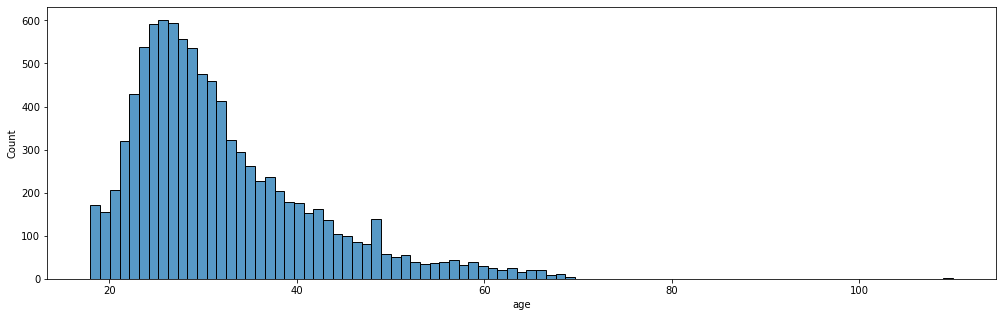

In [19]:
plt.figure(figsize=(17,5))
sns.histplot(x=df["age"]);

In [24]:
df.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single


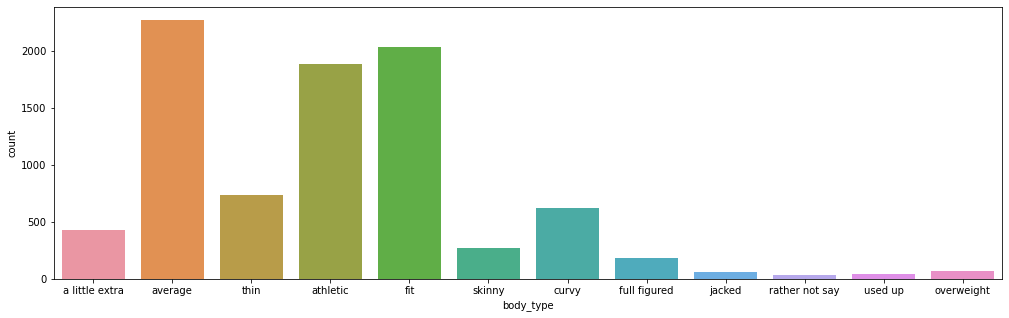

In [25]:
plt.figure(figsize=(17,5))
sns.countplot(x=df["body_type"]);

In [234]:
df.body_type.value_counts()

mesomorph    4840
ectomorph    3283
endomorph    1391
Name: body_type, dtype: int64

In [26]:
#body type dictionary
bodytype={"a little extra":"endomorph","curvy":"endomorph", "full figured":"endomorph","rather not say":"endomorph","used up":"endomorph","overweight":"endomorph",    
          "average":"ectomorph","thin":"ectomorph","skinny":"ectomorph",
          "athletic":"mesomorph","fit":"mesomorph","jacked":"mesomorph"}
df.body_type.replace(bodytype,inplace=True)

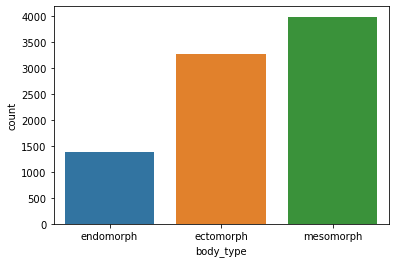

In [27]:
sns.countplot(x=df["body_type"]);

In [28]:
df.body_type.mode()

0    mesomorph
Name: body_type, dtype: object

In [29]:
df["body_type"].fillna("mesomorph",inplace=True)
#I don't think filling body types with mode is that logical in real terms, but I didn't know what to choose else

In [30]:
df.diet.value_counts()

mostly anything        2621
anything               1067
strictly anything       835
mostly vegetarian       568
mostly other            154
strictly vegetarian     135
vegetarian              111
strictly other           64
mostly vegan             52
other                    52
strictly vegan           40
vegan                    28
mostly halal             13
mostly kosher            12
strictly halal            4
strictly kosher           2
kosher                    2
halal                     1
Name: diet, dtype: int64

In [31]:
#diet type dictionary
diettype={"mostly anything":"anything","strictly anything":"anything","mostly other":"anything",
          "mostly vegetarian":"vegetarian","strictly vegetarian":"vegetarian",
          "mostly other":"other","strictly other":"other",
          "mostly vegan":"vegan","strictly vegan":"vegan",
          "mostly halal":"halal","strictly halal":"halal",
          "mostly kosher":"kosher","strictly kosher":"kosher"}
df.diet.replace(diettype,inplace=True)

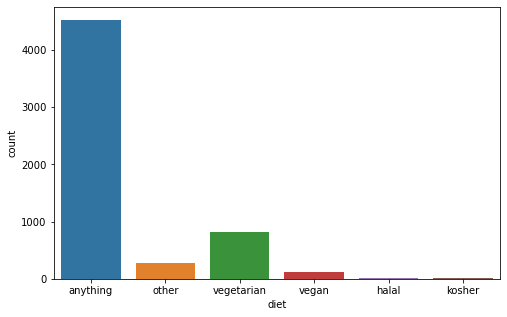

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["diet"]);

In [33]:
df.diet.mode()

0    anything
Name: diet, dtype: object

In [34]:
df.diet.fillna("anything",inplace=True)

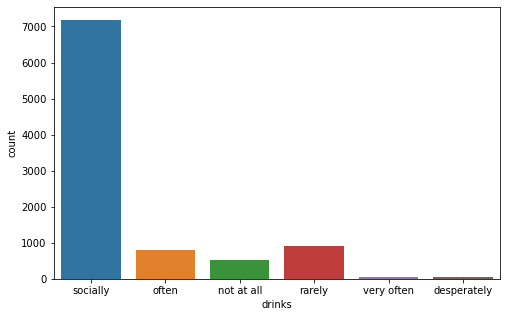

In [237]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["drinks"]);

In [36]:
df.drinks.mode()

0    socially
Name: drinks, dtype: object

In [37]:
df.drinks.fillna("socially",inplace=True)

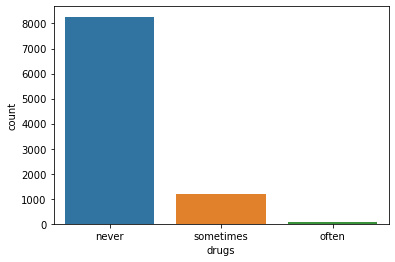

In [235]:
sns.countplot(x=df["drugs"]);

In [39]:
df.drugs.fillna("never",inplace=True)

In [40]:
df.education.value_counts()

graduated from college/university    3770
graduated from masters program       1402
working on college/university         969
working on masters program            251
graduated from two-year college       245
graduated from high school            205
graduated from ph.d program           203
graduated from law school             177
working on two-year college           159
working on ph.d program               159
dropped out of college/university     149
college/university                    134
graduated from space camp             104
dropped out of space camp              87
working on space camp                  73
graduated from med school              73
working on law school                  55
two-year college                       43
working on med school                  41
dropped out of two-year college        34
masters program                        21
working on high school                 20
dropped out of ph.d program            19
dropped out of masters program    

In [41]:
df["education"].replace({"working on":"student","graduated from":"graduated","dropped out":"dropped"},regex=True)
df["education"]=df["education"].str.split().str[0]
df["education"].replace({"college/university":"student","two-year":"student","masters":"student","working":"student","space":"student","ph.d":"graduated","law":"graduated","high":"graduated"},regex=True,inplace=True)

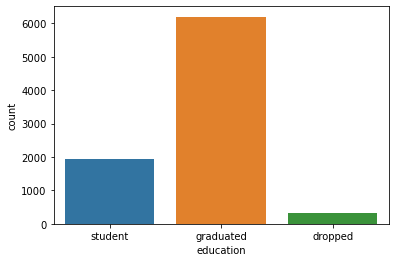

In [42]:
sns.countplot(x=df["education"]);

In [43]:
# since our question is to predict age and generations, essay and ethnicity columns don't have any impact
df.drop(["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9","ethnicity"],axis=1,inplace=True)

In [44]:
df.education.fillna("graduated",inplace=True)

In [45]:
df.shape

(9514, 20)

In [46]:
df.head(2)

,age,body_type,diet,drinks,drugs,education,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,endomorph,anything,socially,never,student,75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,ectomorph,other,often,sometimes,student,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single


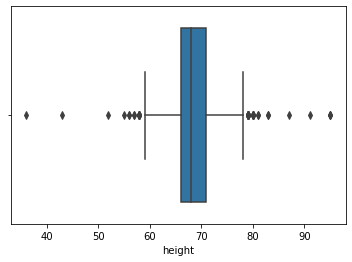

In [47]:
sns.boxplot(x=df["height"]);

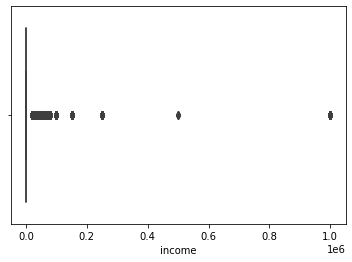

In [48]:
sns.boxplot(x=df["income"]);

In [49]:
#we can also assume that the job column is not important to our question
del df["job"]

In [50]:
df.shape

(9514, 19)

By exploring the “last_online” feature’s min and max, the OKCupid dataset could be inferred 
to be dated around 2011 or 2012

In [51]:
df.last_online.min(), df.last_online.max()

('2011-06-27-16-17', '2012-06-30-08-23')

In [52]:
#Feature Engineering

In [53]:
df["last_online"].str[:4]

0       2012
1       2012
2       2012
3       2012
4       2012
        ... 
9509    2012
9510    2012
9511    2012
9512    2012
9513    2012
Name: last_online, Length: 9514, dtype: object

In [54]:
df["last_online"].str[5:7]

0       06
1       06
2       06
3       06
4       06
        ..
9509    06
9510    04
9511    04
9512    03
9513    06
Name: last_online, Length: 9514, dtype: object

In [55]:
# split last_online columns to year and month and define them as integers and delete last_online column

In [56]:
df["last_online_year"]=2022-(df["last_online"].str[:4]).astype(int)

In [57]:
df["last_online_month"]=(df["last_online"].str[5:7]).astype(int)

In [58]:
del df["last_online"]

C:\Users\Kemal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


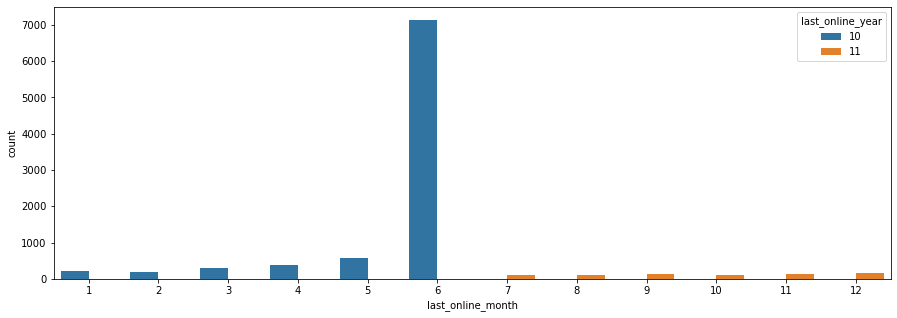

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(df["last_online_month"],hue=df["last_online_year"]);

In [60]:
df.isnull().sum()

age                     0
body_type               0
diet                    0
drinks                  0
drugs                   0
education               0
height                  0
income                  0
location                0
offspring            5628
orientation             0
pets                 3162
religion             3253
sex                     0
sign                 1738
smokes                918
speaks                  6
status                  0
last_online_year        0
last_online_month       0
dtype: int64

In [61]:
df.location.value_counts()

san francisco, california          4835
oakland, california                1181
berkeley, california                768
san mateo, california               207
palo alto, california               170
alameda, california                 155
san rafael, california              134
emeryville, california              117
redwood city, california            115
walnut creek, california            112
hayward, california                 112
menlo park, california               97
daly city, california                95
san leandro, california              94
vallejo, california                  90
richmond, california                 67
el cerrito, california               64
burlingame, california               63
novato, california                   59
mountain view, california            56
pleasant hill, california            53
south san francisco, california      53
stanford, california                 53
castro valley, california            51
pacifica, california                 48


In [62]:
df.location=df.location.str.split(",").str[0] 

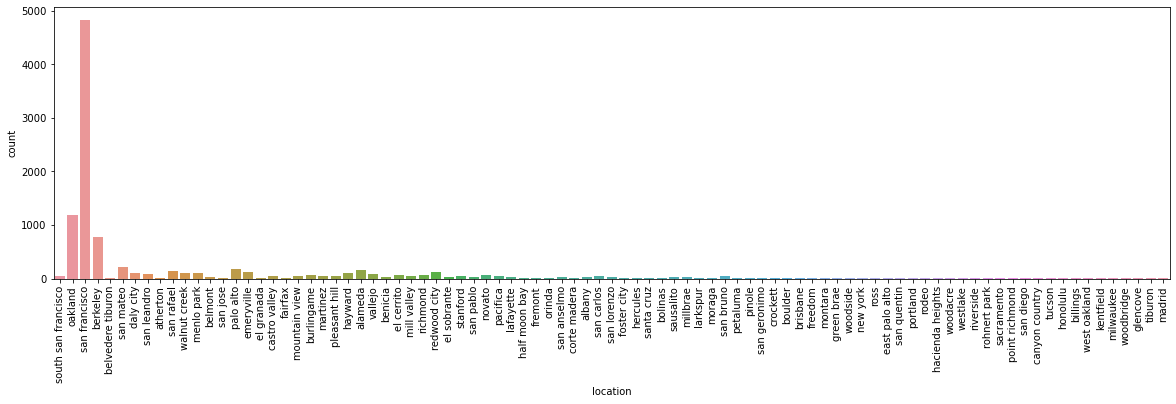

In [63]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(x=df["location"]);

In [64]:
df.offspring.value_counts()

doesn&rsquo;t have kids                                1224
doesn&rsquo;t have kids, but might want them            620
doesn&rsquo;t have kids, but wants them                 578
doesn&rsquo;t want kids                                 454
has a kid                                               304
has kids                                                291
doesn&rsquo;t have kids, and doesn&rsquo;t want any     172
has kids, but doesn&rsquo;t want more                    68
has a kid, but doesn&rsquo;t want more                   41
has a kid, and might want more                           36
wants kids                                               29
might want kids                                          28
has kids, and might want more                            24
has a kid, and wants more                                12
has kids, and wants more                                  5
Name: offspring, dtype: int64

In [65]:
df.offspring=df.offspring.str.replace("[^\w\s]","")

C:\Users\Kemal\AppData\Local\Temp\ipykernel_3720\3631581726.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.offspring=df.offspring.str.replace("[^\w\s]","")


In [66]:
# offspring dictionary: 1 = has kids, 0 has no kids
offspringdict={"doesnrsquot have kids":0,"doesnrsquot have kids but might want them":0,"doesnrsquot have kids but wants them":0,
               "doesnrsquot want kids":0,"doesnrsquot have kids and doesnrsquot want any":0,"wants kids":0,"might want kids":0,
               "has a kid":1,"has kids":1,"has kids but doesnrsquot want more":1,"has a kid but doesnrsquot want more":1,
               "has a kid and might want more":1,"has a kid and might want more":1,"has kids and might want more":1,
               "has a kid and wants more":1,"has kids and wants more":1}
df.offspring.replace(offspringdict,inplace=True)

In [67]:
df["offspring"].fillna(0,inplace=True)

In [68]:
df["offspring"]=df["offspring"].astype(int)

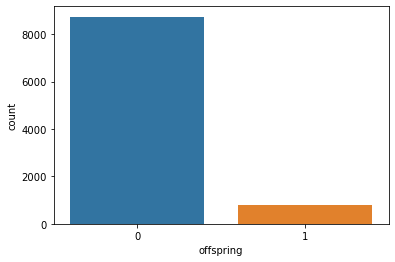

In [69]:
sns.countplot(x=df["offspring"]);

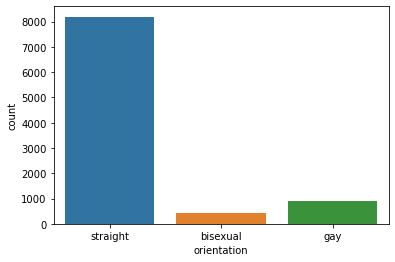

In [70]:
sns.countplot(x=df["orientation"]);

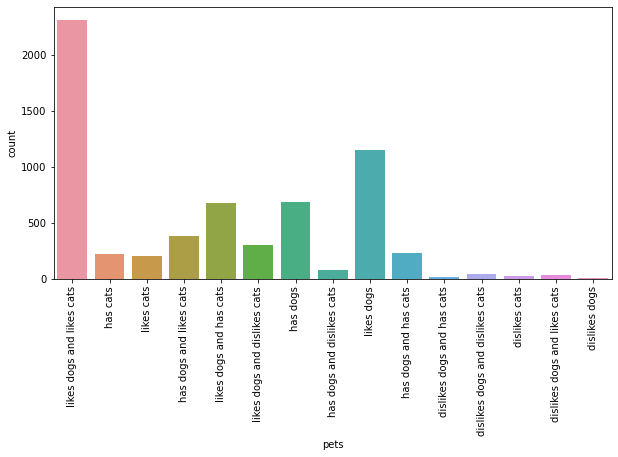

In [71]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x=df["pets"]);

In [72]:
df.pets.mode()

0    likes dogs and likes cats
Name: pets, dtype: object

In [73]:
df["pets"].fillna("likes dogs and likes cats",inplace=True)

In [74]:
df.religion.value_counts()

agnosticism                                   448
other                                         417
agnosticism but not too serious about it      400
agnosticism and laughing about it             386
catholicism but not too serious about it      367
atheism                                       363
atheism and laughing about it                 329
other and laughing about it                   325
christianity but not too serious about it     320
christianity                                  297
other but not too serious about it            243
judaism but not too serious about it          232
atheism but not too serious about it          200
catholicism                                   165
atheism and somewhat serious about it         138
christianity and somewhat serious about it    133
other and somewhat serious about it           122
catholicism and laughing about it             117
judaism and laughing about it                 113
agnosticism and somewhat serious about it     105


In [75]:
df["religion"]=df["religion"].str.split().str[0]

In [76]:
df.religion.value_counts()

agnosticism     1381
other           1193
atheism         1131
christianity     905
catholicism      762
judaism          490
buddhism         288
hinduism          82
islam             29
Name: religion, dtype: int64

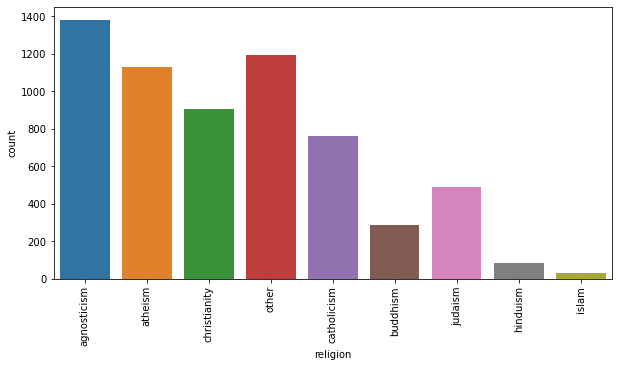

In [77]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x=df["religion"]);

In [78]:
df["religion"].fillna("other",inplace=True)

In [79]:
df.isnull().sum()

age                     0
body_type               0
diet                    0
drinks                  0
drugs                   0
education               0
height                  0
income                  0
location                0
offspring               0
orientation             0
pets                    0
religion                0
sex                     0
sign                 1738
smokes                918
speaks                  6
status                  0
last_online_year        0
last_online_month       0
dtype: int64

In [80]:
df.head(2)

,age,body_type,diet,drinks,drugs,education,height,income,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,last_online_year,last_online_month
0,22.0,endomorph,anything,socially,never,student,75.0,-1.0,south san francisco,0,straight,likes dogs and likes cats,agnosticism,m,gemini,sometimes,english,single,10,6
1,35.0,ectomorph,other,often,sometimes,student,70.0,80000.0,oakland,0,straight,likes dogs and likes cats,agnosticism,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,10,6


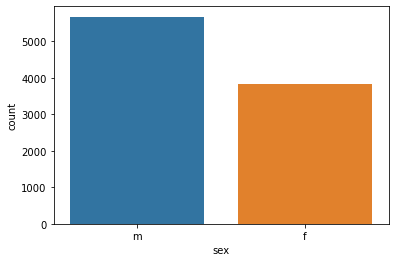

In [81]:
sns.countplot(x=df["sex"]);

In [82]:
df.sign.value_counts()

leo and it&rsquo;s fun to think about            277
taurus and it&rsquo;s fun to think about         275
gemini and it&rsquo;s fun to think about         271
cancer and it&rsquo;s fun to think about         260
scorpio and it&rsquo;s fun to think about        258
libra and it&rsquo;s fun to think about          257
virgo and it&rsquo;s fun to think about          257
pisces and it&rsquo;s fun to think about         253
aries and it&rsquo;s fun to think about          252
aries but it doesn&rsquo;t matter                250
aquarius but it doesn&rsquo;t matter             250
sagittarius and it&rsquo;s fun to think about    242
leo but it doesn&rsquo;t matter                  239
virgo but it doesn&rsquo;t matter                236
aquarius and it&rsquo;s fun to think about       235
gemini but it doesn&rsquo;t matter               235
cancer but it doesn&rsquo;t matter               233
taurus but it doesn&rsquo;t matter               222
sagittarius but it doesn&rsquo;t matter       

In [83]:
df["sign"]=df["sign"].str.split().str[0]

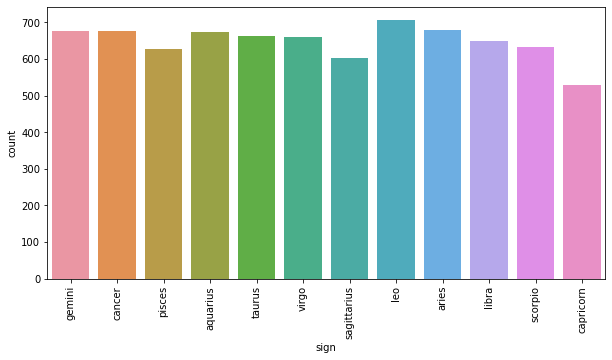

In [84]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x=df["sign"]);

In [85]:
df.sign.mode()

0    leo
Name: sign, dtype: object

In [86]:
df["sign"].fillna("unknown",inplace=True)

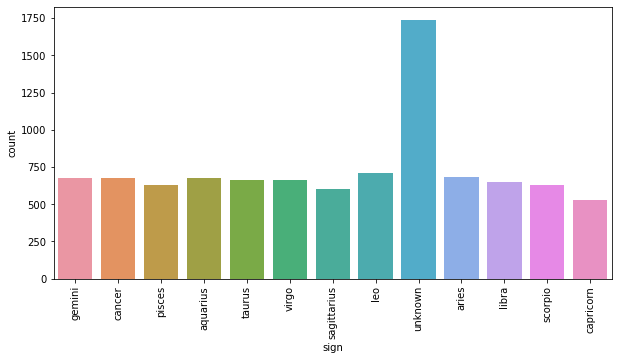

In [87]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x=df["sign"]);

In [88]:
df.smokes.value_counts()

no                7011
sometimes          565
when drinking      480
yes                307
trying to quit     233
Name: smokes, dtype: int64

In [89]:
smokedict={"no":0,"sometimes":1,"when drinking":1,"yes":1,"trying to quit":1}
df.smokes.replace(smokedict,inplace=True)

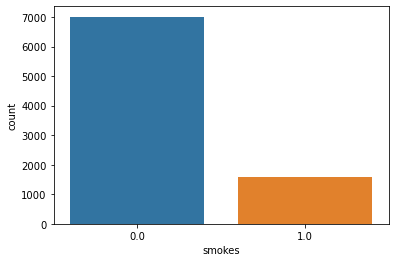

In [90]:
sns.countplot(x=df["smokes"]);

In [91]:
df.smokes.fillna(0.0,inplace=True)

In [92]:
df["smokes"]=df.smokes.astype(int)

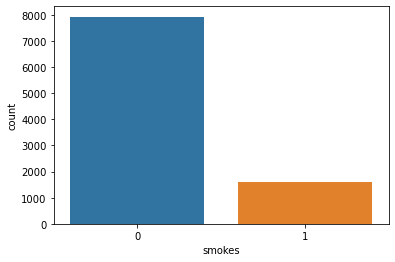

In [93]:
sns.countplot(x=df["smokes"]);

In [94]:
df.speaks.value_counts()

english                                                                                3415
english (fluently)                                                                     1106
english (fluently), spanish (okay)                                                      322
english (fluently), spanish (poorly)                                                    321
english (fluently), spanish (fluently)                                                  195
                                                                                       ... 
english (fluently), hindi (fluently), spanish (okay)                                      1
english (fluently), danish (fluently), spanish (okay), german (poorly)                    1
english (fluently), spanish (fluently), portuguese                                        1
english (fluently), arabic (fluently), spanish (okay), urdu (okay), gujarati (okay)       1
english (fluently), french (okay), swedish (poorly)                             

In [95]:
#count() method returns the number of occurrences of the substring in the given string
df.speaks.str.count("fluently")

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
9509    0.0
9510    0.0
9511    1.0
9512    1.0
9513    0.0
Name: speaks, Length: 9514, dtype: float64

In [96]:
df["number_of_fluent_languages"]=df.speaks.str.count("fluently")
df["number_of_fluent_languages"].replace(0,1,regex=True,inplace=True)
df["number_of_poorly_languages"]=df.speaks.str.count("poorly")

In [97]:
del df["speaks"]

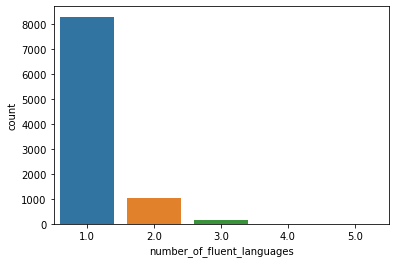

In [98]:
sns.countplot(x=df["number_of_fluent_languages"]);

In [99]:
df.number_of_fluent_languages.fillna(1,inplace=True)

In [100]:
df["number_of_fluent_languages"]=df["number_of_fluent_languages"].astype(int)

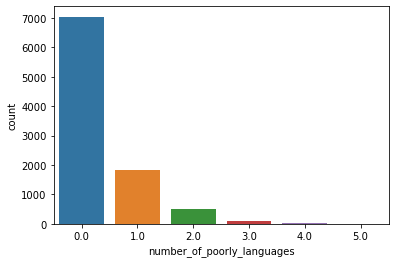

In [101]:
sns.countplot(x=df["number_of_poorly_languages"]);

In [102]:
df.number_of_poorly_languages.fillna(0,inplace=True)

In [103]:
df["number_of_poorly_languages"]=df["number_of_poorly_languages"].astype(int)

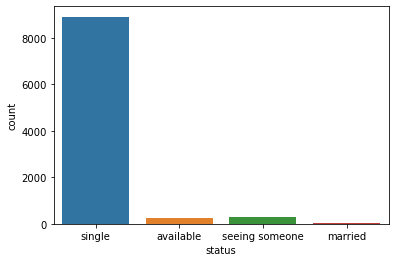

In [104]:
sns.countplot(x=df["status"]);

In [105]:
df["status"].replace({"available":"single"},inplace=True)

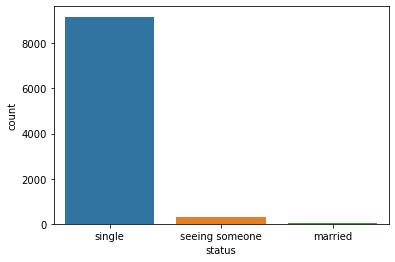

In [106]:
sns.countplot(x=df["status"]);

In [107]:
df.isnull().sum()

age                           0
body_type                     0
diet                          0
drinks                        0
drugs                         0
education                     0
height                        0
income                        0
location                      0
offspring                     0
orientation                   0
pets                          0
religion                      0
sex                           0
sign                          0
smokes                        0
status                        0
last_online_year              0
last_online_month             0
number_of_fluent_languages    0
number_of_poorly_languages    0
dtype: int64

In [108]:
df.shape

(9514, 21)

At the time, a “Millennial” would be aged from 18 to 32, a “Gen X-er” 33 to 47, and “Boomers” from 48 to 70 years 

In [109]:
df.age.values

array([22., 35., 38., ..., 34., 29., 49.])

In [110]:
generation = []

for i in df.age.values:
    if 18 <= i <= 32:
        generation.append("Millennial")
    elif 33 <= i <= 47:
        generation.append("Gen X-er")
    elif 48 <= i <= 70:
        generation.append("Boomers")
    else:
        generation.append("unknown")

df["generation"]=generation

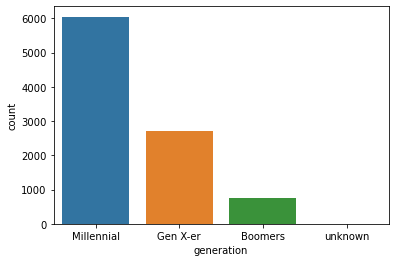

In [111]:
sns.countplot(x=df["generation"]);

In [112]:
df.generation.replace({"unknown":"Millennial"},inplace=True)

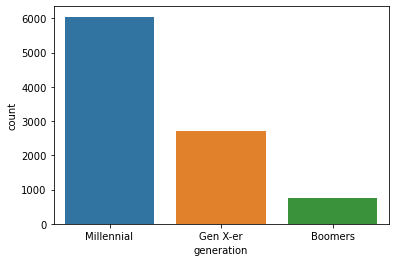

In [113]:
sns.countplot(x=df["generation"]);

In [114]:
df.generation.value_counts()

Millennial    6048
Gen X-er      2721
Boomers        745
Name: generation, dtype: int64

In [115]:
df.sample(5)

,age,body_type,diet,drinks,drugs,education,height,income,location,offspring,orientation,pets,religion,sex,sign,smokes,status,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages,generation
4485,25.0,ectomorph,anything,socially,never,graduated,76.0,-1.0,san francisco,0,straight,likes dogs and likes cats,judaism,m,aries,0,single,10,6,1,0,Millennial
5570,34.0,mesomorph,anything,socially,never,graduated,70.0,-1.0,san francisco,0,straight,likes dogs and likes cats,other,m,unknown,0,single,10,6,1,1,Gen X-er
3072,31.0,mesomorph,anything,socially,never,student,68.0,-1.0,oakland,0,straight,likes dogs,agnosticism,m,scorpio,0,single,10,6,1,1,Millennial
6655,35.0,ectomorph,anything,socially,never,graduated,74.0,-1.0,burlingame,0,straight,likes dogs and likes cats,atheism,m,virgo,0,single,10,5,1,1,Gen X-er
8553,36.0,mesomorph,anything,socially,never,student,63.0,40000.0,castro valley,0,straight,likes dogs and likes cats,agnosticism,f,aquarius,0,single,11,9,1,0,Gen X-er


In [116]:
df.shape # now our values are ready

(9514, 22)

In [117]:
df.describe()

,age,height,income,offspring,smokes,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages
count,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155,0.082090,0.166597,10.077255,5.864936,1.146941,0.338974
std,9.445488,3.905229,91428.807808,0.274516,0.372635,0.267009,1.627365,0.413248,0.645990
min,18.000000,36.000000,-1.000000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000
25%,25.000000,66.000000,-1.000000,0.000000,0.000000,10.000000,6.000000,1.000000,0.000000
50%,30.000000,68.000000,-1.000000,0.000000,0.000000,10.000000,6.000000,1.000000,0.000000
75%,36.000000,71.000000,-1.000000,0.000000,0.000000,10.000000,6.000000,1.000000,1.000000
max,110.000000,95.000000,1000000.000000,1.000000,1.000000,11.000000,12.000000,5.000000,5.000000


In [118]:
df.corr()

,age,height,income,offspring,smokes,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages
age,1.000000,-0.022078,0.011424,0.407890,-0.147282,-0.015792,-0.003527,-0.024795,-0.001559
height,-0.022078,1.000000,0.073105,-0.042311,0.035629,-0.016633,-0.010858,0.015458,0.036414
income,0.011424,0.073105,1.000000,0.015323,0.039872,0.009376,0.002043,0.039186,0.028577
offspring,0.407890,-0.042311,0.015323,1.000000,-0.017585,0.022465,0.003408,-0.006265,-0.017036
smokes,-0.147282,0.035629,0.039872,-0.017585,1.000000,0.038617,-0.010214,0.010306,-0.013220
last_online_year,-0.015792,-0.016633,0.009376,0.022465,0.038617,1.000000,0.685183,-0.003813,-0.034827
last_online_month,-0.003527,-0.010858,0.002043,0.003408,-0.010214,0.685183,1.000000,-0.006593,-0.006141
number_of_fluent_languages,-0.024795,0.015458,0.039186,-0.006265,0.010306,-0.003813,-0.006593,1.000000,0.067774
number_of_poorly_languages,-0.001559,0.036414,0.028577,-0.017036,-0.013220,-0.034827,-0.006141,0.067774,1.000000


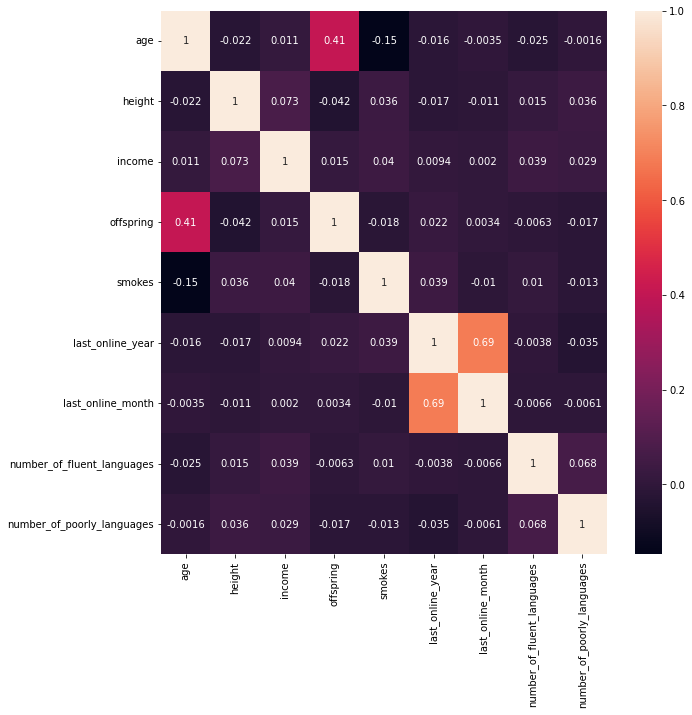

In [119]:
ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot = True);

In [120]:
abs(df.corr()['age']).sort_values(ascending=False)

age                           1.000000
offspring                     0.407890
smokes                        0.147282
number_of_fluent_languages    0.024795
height                        0.022078
last_online_year              0.015792
income                        0.011424
last_online_month             0.003527
number_of_poorly_languages    0.001559
Name: age, dtype: float64

C:\Users\Kemal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kemal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kemal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kemal\anacond

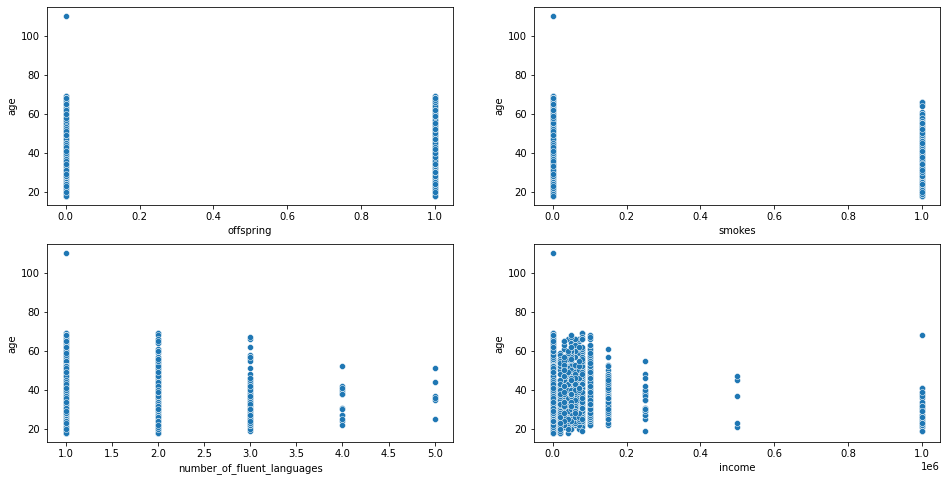

In [121]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(df['offspring'], df['age'])
fig.add_subplot(2,2,2)
sns.scatterplot(df['smokes'],df['age'])
fig.add_subplot(2,2,3)
sns.scatterplot(df['number_of_fluent_languages'],df['age'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['income'],df['age']);

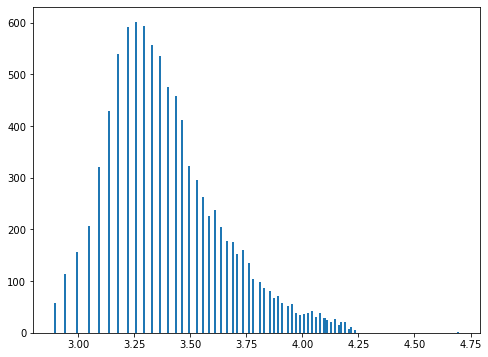

In [122]:
plt.figure(figsize=(8,6))
plt.hist((np.log(df.age)), bins=200);

C:\Users\Kemal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kemal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


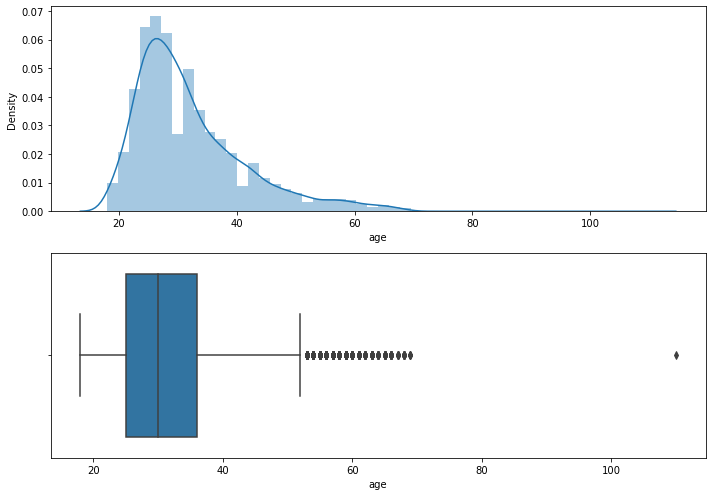

In [123]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['age'])
fig.add_subplot(2,1,2)
sns.boxplot(df['age'])
plt.tight_layout();

<AxesSubplot:>

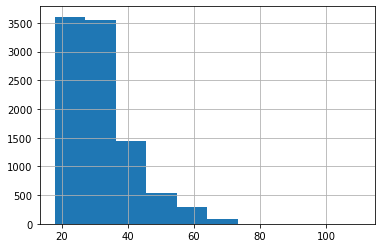

In [124]:
df.age.hist()

### 1 - Can your dating profile predict your age? - Regression

In [125]:
#import Regression Libraries
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

In [126]:
mod1=pd.get_dummies(df,drop_first=True)

In [127]:
mod1.sample(5)

,age,height,income,offspring,smokes,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages,body_type_endomorph,body_type_mesomorph,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,drugs_often,drugs_sometimes,education_graduated,education_student,location_albany,location_atherton,location_belmont,location_belvedere tiburon,location_benicia,location_berkeley,location_billings,location_bolinas,location_boulder,location_brisbane,location_burlingame,location_canyon country,location_castro valley,location_corte madera,location_crockett,location_daly city,location_east palo alto,location_el cerrito,location_el granada,location_el sobrante,location_emeryville,location_fairfax,location_foster city,location_freedom,location_fremont,...,location_tiburon,location_tucson,location_vallejo,location_walnut creek,location_west oakland,location_westlake,location_woodacre,location_woodbridge,location_woodside,orientation_gay,orientation_straight,pets_dislikes dogs,pets_dislikes dogs and dislikes cats,pets_dislikes dogs and has cats,pets_dislikes dogs and likes cats,pets_has cats,pets_has dogs,pets_has dogs and dislikes cats,pets_has dogs and has cats,pets_has dogs and likes cats,pets_likes cats,pets_likes dogs,pets_likes dogs and dislikes cats,pets_likes dogs and has cats,pets_likes dogs and likes cats,religion_atheism,religion_buddhism,religion_catholicism,religion_christianity,religion_hinduism,religion_islam,religion_judaism,religion_other,sex_m,sign_aries,sign_cancer,sign_capricorn,sign_gemini,sign_leo,sign_libra,sign_pisces,sign_sagittarius,sign_scorpio,sign_taurus,sign_unknown,sign_virgo,status_seeing someone,status_single,generation_Gen X-er,generation_Millennial
6641,46.0,70.0,50000.0,0,0,10,6,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
8989,25.0,69.0,-1.0,0,1,10,5,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
6098,28.0,74.0,-1.0,0,0,10,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
3962,21.0,70.0,-1.0,0,0,10,6,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1462,19.0,62.0,-1.0,0,0,10,6,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1


In [128]:
x = mod1.drop("age",axis=1)
y = df[["age"]]

In [129]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [130]:
algo_test(x,y)

C:\Users\Kemal\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,R_Squared,RMSE,MAE
Gradient Boosting,0.816895,4.184194,3.128760
XGradientBooting,0.809923,4.263109,3.155020
Ridge,0.809643,4.266243,3.200753
Linear,0.809178,4.271446,3.204444
Extra Tree,0.670109,5.616249,4.205553
Lasso,0.554708,6.525044,4.415886
ElasticNet,0.303141,8.162698,5.570627


#### try with deep learning

In [131]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [132]:
model = Sequential()
model.add(Dense(700,activation='relu'))
model.add(Dense(700,activation='relu'))
model.add(Dense(700,activation='relu'))
model.add(Dense(700,activation='relu'))
model.add(Dense(700,activation='relu'))
model.add(Dense(700,activation='relu'))
model.add(Dense(700,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [141]:
model.fit(x=x_train,y=y_train, validation_data=(x_test,y_test),batch_size=128,epochs=51)
model.summary()

Epoch 1/51
60/60 [==============================] - 1s 14ms/step - loss: 122.5184 - val_loss: 127.3100
Epoch 2/51
60/60 [==============================] - 1s 14ms/step - loss: 119.0594 - val_loss: 120.3822
Epoch 3/51
60/60 [==============================] - 1s 14ms/step - loss: 115.2919 - val_loss: 122.2430
Epoch 4/51
60/60 [==============================] - 1s 14ms/step - loss: 113.0936 - val_loss: 112.7182
Epoch 5/51
60/60 [==============================] - 1s 14ms/step - loss: 109.2847 - val_loss: 117.5127
Epoch 6/51
60/60 [==============================] - 1s 14ms/step - loss: 106.8125 - val_loss: 106.3017
Epoch 7/51
60/60 [==============================] - 1s 13ms/step - loss: 100.8536 - val_loss: 110.7441
Epoch 8/51
60/60 [==============================] - 1s 14ms/step - loss: 109.6983 - val_loss: 118.0898
Epoch 9/51
60/60 [==============================] - 1s 13ms/step - loss: 98.7655 - val_loss: 96.8971
Epoch 10/51
60/60 [==============================] - 1s 14ms/step - loss: 9

<AxesSubplot:>

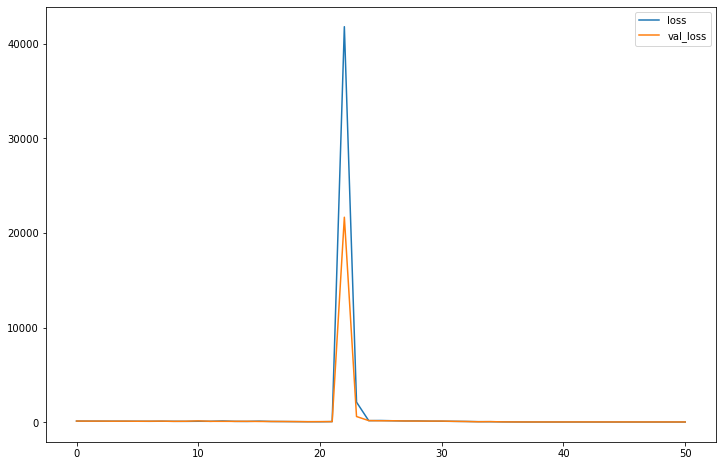

In [142]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [143]:
pred=model.predict(x_test)

60/60 [==============================] - 0s 3ms/step


In [144]:
(mean_squared_error(y_test,pred))**0.5  

5.475963928215035

In [145]:
r2_score(y_test,pred)

0.670064421395138

In [139]:
# i did run the model.fit code 4 times, first it a score of -0.1 than it got better but not above 0.67

### 2 - Can your dating profile predict the generation you belong to? (Millennial, Gen X-er, or Boomers) - Classification

In [200]:
#import classification libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [212]:
#we don't need age because we split it up tp generation
mod2=df.drop(["generation","age"],axis=1)

In [213]:
mod2.sample(5)

,body_type,diet,drinks,drugs,education,height,income,location,offspring,orientation,pets,religion,sex,sign,smokes,status,last_online_year,last_online_month,number_of_fluent_languages,number_of_poorly_languages
3638,mesomorph,anything,socially,sometimes,graduated,63.0,-1.0,oakland,0,straight,likes dogs and likes cats,other,f,libra,0,single,10,5,1,0
1047,mesomorph,anything,socially,sometimes,graduated,72.0,-1.0,san francisco,0,straight,likes dogs and likes cats,other,m,aquarius,0,single,10,6,1,0
5493,mesomorph,anything,often,never,student,72.0,-1.0,oakland,0,straight,likes dogs and likes cats,agnosticism,m,libra,1,single,10,6,1,2
2300,ectomorph,anything,socially,sometimes,graduated,74.0,150000.0,san francisco,0,straight,likes dogs and likes cats,atheism,m,capricorn,0,single,11,12,1,1
5554,ectomorph,anything,socially,never,student,68.0,-1.0,redwood city,0,straight,likes dogs and likes cats,other,m,unknown,0,single,10,6,1,2


In [214]:
x2 = pd.get_dummies(mod2,drop_first=True)
y2 = df["generation"]

In [242]:
#x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.2,random_state=42)

In [243]:
def classification_funct(x,y):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)


In [244]:
classification_funct(x2,y2)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Boomers' 'Gen X-er' 'Millennial']

In [217]:
g=GaussianNB()
b=BernoulliNB()
k=KNeighborsClassifier()
l=LogisticRegression()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
gb=GradientBoostingClassifier()

In [218]:
g.fit(x2,y2)
b.fit(x2,y2)
k.fit(x2,y2)
l.fit(x2,y2)
d.fit(x2,y2)
r.fit(x2,y2)
gb.fit(x2,y2)

GradientBoostingClassifier()

In [219]:
tahmin1=g.predict(x2)
tahmin2=b.predict(x2)
tahmin3=k.predict(x2)
tahmin4=l.predict(x2)
tahmin5=d.predict(x2)
tahmin6=r.predict(x2)
tahmin7=gb.predict(x2)

In [220]:
accuracy_score(tahmin1,y2) #Gaussian

0.6356947656085769

In [222]:
confusion_matrix(tahmin1,y2)

array([[   0,    0,    0],
       [   0,    0,    0],
       [ 745, 2721, 6048]], dtype=int64)

In [223]:
print(classification_report(tahmin1,y2))

              precision    recall  f1-score   support

     Boomers       0.00      0.00      0.00         0
    Gen X-er       0.00      0.00      0.00         0
  Millennial       1.00      0.64      0.78      9514

    accuracy                           0.64      9514
   macro avg       0.33      0.21      0.26      9514
weighted avg       1.00      0.64      0.78      9514



C:\Users\Kemal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kemal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kemal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


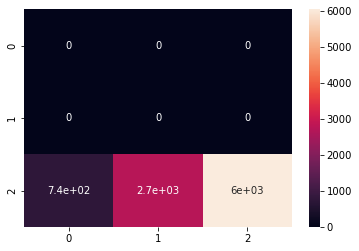

In [224]:
sns.heatmap(confusion_matrix(tahmin1,y2),annot=True);

In [225]:
accuracy_score(tahmin2,y2) # Bernoullie

0.6654404036157242

In [229]:
accuracy_score(tahmin3,y2) # KNN

0.7228295143998318

In [230]:
accuracy_score(tahmin4,y2) # Log Reg

0.6356947656085769

In [231]:
accuracy_score(tahmin5,y2) # Dec Tree

0.9926424216943451

In [232]:
accuracy_score(tahmin6,y2) # Rand Forest

0.9926424216943451

In [233]:
accuracy_score(tahmin7,y2) # Grad Boost

0.6968677738070213